<a href="https://colab.research.google.com/github/daviddesancho/QuimicaFisicaII-Practicas/blob/master/ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El modelo de Ising
El modelo de Ising es un modelo de magnetización. El hamiltoniano se puede escribir como 
\begin{equation}
\hat{H}=-J\sum_{ij}\sigma_i\sigma_j + H\sum_i \sigma_i
\end{equation}
donde $J$ es la fortaleza de las interacciones entre spines, $ij$ son los pares de spines vecinos y los spines pueden adoptar los valores $S_k=\pm 1$. A temperaturas inferiores a la temperatura crítica $T_c$, el sistema está magnetizado; a temperaturas superiores el sistema es paramagnético.

En este "notebook" realizamos una simulación de Monte Carlo usando el algoritmo de Metrópolis de un modelo de Ising en 2D.

In [ ]:
# Simulating the Ising model
# Code by: https://rajeshrinet.github.io/
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model ''' 
    ## monte carlo moves

    def __init__(self, N=20):
      '''
      Parameters
      ----------
      N : int
        Size of the lattice
      
      '''
      self.N = N
      self.config = 2*np.random.randint(2, size=(N,N)) - 1
      self.configPlot(0)

    def mcmove(self, beta):
        ''' Executes the MC moves using the Metropolis algorithm
        
        Parameters
        ----------
        beta : float
          Inverse temperature

        '''
        N = self.N
        for i in range(N):
          for j in range(N):            
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  self.config[a, b]
            nb = self.config[(a+1)%N,b] + self.config[a,(b+1)%N] + \
                        self.config[(a-1)%N,b] + self.config[a,(b-1)%N]
            cost = 2*s*nb
            if cost < 0:	
                s *= -1
            elif rand() < np.exp(-cost*beta):
                s *= -1
            self.config[a, b] = s
    
    def simulate(self, temp=2.3, mcsteps=10, fwrite=10):   
        ''' Simulates the Ising model
        
        Parameters
        ----------
        temp : float
          Temperature
        mcsteps : int
          Number of MC steps
        fwrite : int
          Frequency of writing
        '''
        self.temp = temp
        for i in range(1, mcsteps+1):
            self.mcmove(1.0/temp)
            if (i%fwrite) == 0:       
              self.configPlot(i);                 
                    
    def configPlot(self, i):
        ''' Plots the lattice configuration 
        
        Parameters
        ----------
        i : int
          MC step
        '''
        fig, ax =  plt.subplots(figsize=(4,4))  
        plt.setp(ax.get_yticklabels(), visible=False)
        plt.setp(ax.get_xticklabels(), visible=False)      
        im = ax.imshow(self.config, cmap=plt.cm.viridis);
        ax.set_title('MC step=%d'%(i))
        plt.tight_layout()    

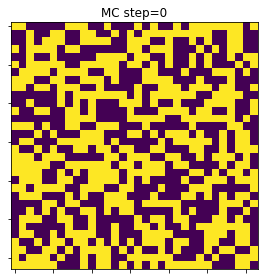

In [ ]:
rm = Ising(N=32)

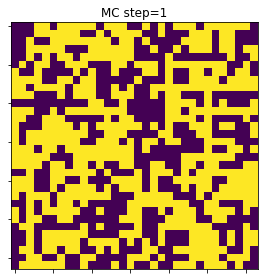

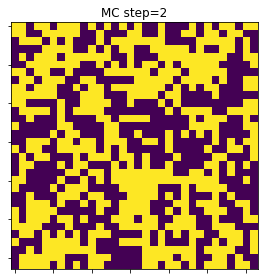

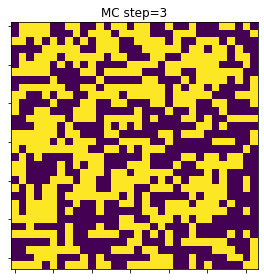

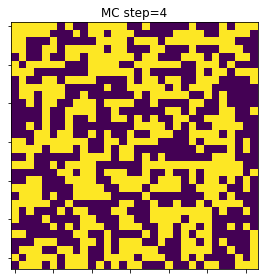

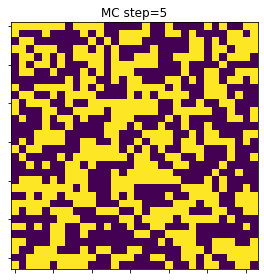

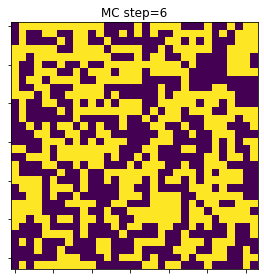

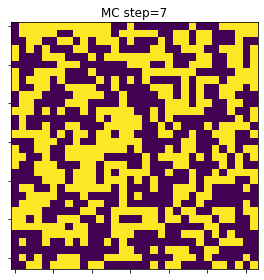

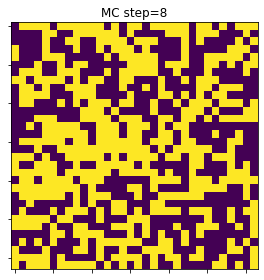

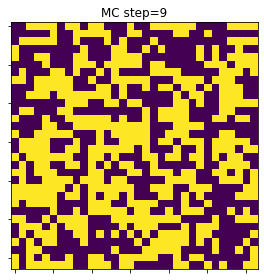

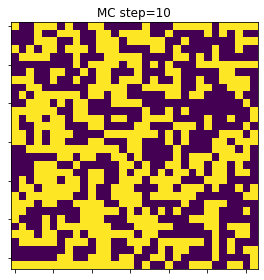

In [ ]:
rm.simulate(temp=10., mcsteps=10, fwrite=1)